# SD202 TP3 - Views, Updates and Database Design

Nom : Yalin HE

The objectives for this TP are:

1. Create and use SQL Views
2. Update database content
3. Design the database schema for a marketplace


For the first 2 parts we will use the _wine_ database and the Tables created in TP2.

A reminder of the wine database schema:

In [54]:
import sqlite3

In [55]:
def printSchema(connection):
    ### Source: http://stackoverflow.com/a/35092773/4765776
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))

In [56]:
conn = sqlite3.connect('wine.db')
c = conn.cursor()
print("Database schema:")
printSchema(conn)

Database schema:
Brouilly_regions:
  0: REGION(TEXT)
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(NUM)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
Pommard_regions:
  0: REGION(TEXT)
RBA:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
RBB:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
Table_Client:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
Table_Harvest:
  0: NV(NUM)
  1: NP(NUM)
  2: QTE(NUM)
Table_Place:
  0: LIEU(TEXT)
  1: REGION(TEXT)
Table_Production:
  0: NP(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: REGION(TEXT)
Table_Sales:
  0: NV(NUM)
  1: NB(NUM)
  2: DATES(NUM)
  3: LIEU(TEXT)
  4: QTE(NUM)
Table_Vin:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
Table_Wine2:
  0: NV(

Again, we recommend inline %sql as an alternative to the sqlite3 package

In [57]:
%load_ext sql
%sql sqlite:///wine.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Recreate the Tables in 3NF/BCNF from Master2 as you did in the TP2

In [58]:
# Write corresponding code here

#-- Dropping the tables if they already exist
%sql DROP TABLE IF EXISTS Table_Wine2;
%sql DROP TABLE IF EXISTS Table_Client;
%sql DROP TABLE IF EXISTS Table_Sales;
%sql DROP TABLE IF EXISTS Table_Place;

#-- Creating the Table_Wine
%sql CREATE TABLE Table_Wine2 AS \
SELECT DISTINCT NV, CRU, DEGRE, MILL \
FROM MASTER2 \
WHERE NV IS NOT NULL;

#-- Creating the Table_Client
%sql CREATE TABLE Table_Client AS \
SELECT DISTINCT NB, NOM, PRENOM, TYPE \
FROM MASTER2 \
WHERE NB IS NOT NULL;

#-- Creating the Table_Sales
%sql CREATE TABLE Table_Sales AS \
SELECT DISTINCT NV, NB, DATES, LIEU, QTE \
FROM MASTER2 \
WHERE NV IS NOT NULL AND NB IS NOT NULL;

#-- Creating the Table_Place
%sql CREATE TABLE Table_Place AS \
SELECT DISTINCT LIEU, REGION \
FROM MASTER2 \
WHERE LIEU IS NOT NULL;

print("\nContent of the database")
printSchema(conn)

 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.
 * sqlite:///wine.db
Done.

Content of the database
Brouilly_regions:
  0: REGION(TEXT)
MASTER1:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: QTE(NUM)
  5: NP(NUM)
  6: NOM(TEXT)
  7: PRENOM(TEXT)
  8: REGION(TEXT)
MASTER2:
  0: NV(NUM)
  1: CRU(TEXT)
  2: DEGRE(NUM)
  3: MILL(NUM)
  4: DATES(NUM)
  5: LIEU(TEXT)
  6: QTE(NUM)
  7: NB(NUM)
  8: NOM(TEXT)
  9: PRENOM(TEXT)
  10: TYPE(TEXT)
  11: REGION(TEXT)
Pommard_regions:
  0: REGION(TEXT)
RBA:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
RBB:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
Table_Client:
  0: NB(NUM)
  1: NOM(TEXT)
  2: PRENOM(TEXT)
  3: TYPE(TEXT)
Table_Harvest:
  0: NV(NUM)
  1: NP(NUM)
  2: QTE(NUM)
Table_Place:
  0: LIEU(TEXT)
  1: REGION(TEXT)
Table_Production:
  0: NP(NUM)
  1

___
# PART I: CREATE AND USE VIEWS

A view is a virtual table based on the result-set of an SQL statement. Views are stored in the database with an associated name.

Views are created following the syntax:

```sql
CREATE VIEW view_name AS
SELECT column1, column2.....
FROM table_name
WHERE [condition];
```

An useful command is:

```sql
DROP VIEW IF EXISTS view_name;
```


__Note:__ Use it with caution (only drop something if you are sure)

__1.1__ Create a view 'bons_buveurs' with the clients (buveurs) of type 'gros' or 'moyen'.

In [59]:
%%sql 
DROP VIEW IF EXISTS bons_buveurs;

CREATE VIEW bons_buveurs AS 
SELECT *
FROM Table_Client
WHERE TYPE = "gros" or TYPE = "moyen";

 * sqlite:///wine.db
Done.
Done.


[]

In [60]:
# Test
%sql SELECT * FROM bons_buveurs ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


__1.2__ Create the view 'buveurs_asec' with clients (buveurs) who have not bought any wine.

In [61]:
%%sql 
DROP VIEW IF EXISTS buveurs_asec;

CREATE VIEW buveurs_asec AS 
SELECT *
FROM Table_Client c
WHERE NOT EXISTS (
    SELECT 1
    FROM Table_Sales a
    WHERE a.NB = c.NB
);


 * sqlite:///wine.db
Done.
Done.


[]

In [62]:
# Test
%sql SELECT * FROM buveurs_asec ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


__1.3__ Create the view 'buveurs_achats' complementary to the previous one.

In [63]:
%%sql
DROP VIEW IF EXISTS buveurs_achats;

CREATE VIEW buveurs_achats AS   
SELECT *
FROM Table_Client c
WHERE NOT EXISTS (
    SELECT 1
    FROM buveurs_asec b
    WHERE b.NB = c.NB
);


 * sqlite:///wine.db
Done.
Done.


[]

In [64]:
# Test
%sql SELECT * FROM buveurs_achats ORDER BY nb;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
1,Aristote,None,petit
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
5,Audiberti,Jacques,petit
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
9,Ajar,Emile,petit
10,Andersen,Yann,gros


__1.4__ Create the view 'q83pl' (LIEU, CRU, QTE_BUE) that provides by LIEU and CRU the total quantities bought in 1983 by all the clients (buveurs).

In [65]:
%%sql
DROP VIEW IF EXISTS q83pl;

CREATE VIEW q83pl AS 
SELECT a.LIEU, v.CRU, SUM(a.QTE) AS QTE_BUE
FROM Table_Sales a
INNER JOIN Table_Wine2 v ON v.NV = a.NV
WHERE (strftime('%Y', a.DATES) = "1983")
GROUP BY a.LIEU, v.CRU;



 * sqlite:///wine.db
Done.
Done.


[]

In [66]:
# Test
%sql SELECT * FROM q83pl;

 * sqlite:///wine.db
Done.


LIEU,CRU,QTE_BUE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,10
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Coteaux du Tricastin,1
PARIS,Pouilly Vinzelles,3
RENNES,Mercurey,1
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


__1.5__  Can we define the same view with ascending order over the attribute QTE? Provide an explanation for your answer.

In [67]:
%%sql 
DROP VIEW IF EXISTS q83pl1;

CREATE VIEW q83pl1 AS 
SELECT LIEU, CRU, SUM(QTE) AS QTE_BUE
FROM Table_Sales
INNER JOIN Table_Wine2 ON Table_Wine2.NV = Table_Sales.NV
WHERE (strftime('%Y',DATES) = "1983")
GROUP BY LIEU, CRU
ORDER BY QTE;

SELECT * FROM q83pl;  

 * sqlite:///wine.db
Done.
Done.
Done.


LIEU,CRU,QTE_BUE
CAEN,Seyssel,3
LILLE,Pommard,5
LYON,Beaujolais Villages,10
LYON,Julienas,2
PARIS,Beaujolais Primeur,4
PARIS,Coteaux du Tricastin,1
PARIS,Pouilly Vinzelles,3
RENNES,Mercurey,1
ROCQUENCOURT,Beaujolais Villages,260
ROCQUENCOURT,Saint Amour,80


<div style="background-color:#ffffcc; padding: 20px">
Answer:While it is technically feasible to use an ascending order (via an ORDER BY clause) in your SQL query with sqlite, it's important to note that views are not inherently ordered. Views serve as in-memory logical tables, without an inherent order associated with them. Therefore, the purpose of views is not to dictate the order of presentation and, as a result, they cannot be sorted directly using the ORDER BY clause. The common practice when you need the results from a view to be presented in ascending order is to include the ORDER BY clause in the individual queries that retrieve data from the view, as opposed to including it in the view definition itself (refer to question 2.1).
</div>

___
# PART II: UPDATE DATABASE CONTENT

The syntax for the Update statement is:

```sql
UPDATE table_name
SET column1 = value1, column2 = value2...., columnN = valueN
WHERE [condition];
```

The syntax for the Insert statement is:

```sql
INSERT INTO TABLE_NAME [(column1, column2, column3,...columnN)]  
VALUES (value1, value2, value3,...valueN);
```


Database updates are commited automatically in Jupyter/Python. _Transactions_ are an option to control and reverse changes. Additionally we can just reload a backup of the database (NOT an option in deployed systems)

__Note:__ Different to other Database Management Systems, SQLite views are read-only and so you may not execute a DELETE, INSERT or UPDATE statement on a view.

__2.1__ Create a table 'RBB' with the same schema as 'bons_buveurs' which contains the tuples selected from 'bons_buveurs'

In [68]:
%%sql DROP TABLE IF EXISTS RBB;

CREATE TABLE RBB AS
SELECT *
FROM bons_buveurs;

 * sqlite:///wine.db
Done.
Done.


[]

In [69]:
# Test
%sql SELECT * FROM RBB ORDER BY NB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen
3,Aron,Raymond,gros
4,Apollinaire,Guillaume,moyen
6,Arrabal,Fernando,gros
7,Anouilh,Jean,moyen
8,Aragon,Louis,gros
10,Andersen,Yann,gros
12,Bataille,Georges,moyen
13,Barthes,Roland,moyen
14,Bory,Jean Louis,gros


__2.2__ Update the table you used to create 'bons_buveurs': Change the 'type' to 'gros' if the total of quantities bought is over 100.

Find the instances to update (schema may be different from the one in your table)

In [70]:
%%sql
SELECT clientData.NB, NOM, PRENOM, TYPE, TOTAL  
FROM (
    SELECT NB, SUM(QTE) AS TOTAL 
    FROM Table_Sales
    GROUP BY NB
    HAVING TOTAL > 100
) AS clientData
INNER JOIN Table_Client ON clientData.NB = Table_Client.NB
WHERE TYPE NOT LIKE "gros"
ORDER BY clientData.NB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE,TOTAL
2,Artaud,Antonin,moyen,583
5,Audiberti,Jacques,petit,113
9,Ajar,Emile,petit,140
44,Gide,Andre,petit,171


Update instances

In [71]:
%%sql
UPDATE Table_Client
SET TYPE = "gros"
WHERE NB in (SELECT SUB.NB  
             FROM (SELECT NB, SUM(QTE) AS TOTAL FROM Table_Sales
             GROUP BY NB
             HAVING TOTAL >100) SUB
             INNER JOIN Table_Client ON SUB.NB = Table_Client.NB
             WHERE TYPE !="gros");

 * sqlite:///wine.db
4 rows affected.


[]

__2.3__ Compare the content of _table_ 'RBB' and the _view_ 'bons_buveurs' after the update. What differences do you see? Explain

In [72]:
%%sql
SELECT * FROM RBB WHERE NB in (2,5,9,44);

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,moyen


In [73]:
%%sql 
SELECT * FROM bons_buveurs WHERE NB in (2,5,9,44) ORDER BY NB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
2,Artaud,Antonin,gros
5,Audiberti,Jacques,gros
9,Ajar,Emile,gros
44,Gide,Andre,gros


<div style="background-color:#ffffcc; padding: 20px">
Answer: We observe that the 'bons_buveurs' view reflects the recent changes, however, the 'RBB' table does not. This is attributable to the nature of views - they are essentially stored SQL SELECT statements that present themselves as tables. Consequently, the tuples within a view are separate from the tables they are derived from, and are assembled from the base tables each time a query is made against the view.

In the current scenario, the source table ('Table_Client') has been modified, hence the changes are mirrored in the 'bons_buveurs' view upon querying. On the contrary, the 'RBB' table represents a physical entity stored in memory, which means it remains unaffected by changes in other tables unless explicitly updated via a specific query.
    </div>

__2.4__ Create a table 'RBA' with the same schema as 'buveurs_asec' which contains the tuples selected from 'buveurs_asec'

In [74]:
%%sql DROP TABLE IF EXISTS RBA;

CREATE TABLE RBA AS
SELECT *
FROM buveurs_asec;

 * sqlite:///wine.db
Done.
Done.


[]

In [75]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


__2.5__ Insert a tuple (101, 'your last name', 'your first name', 'your type of purchases(petit, moyen, or gros)') to 'RBA'

In [76]:
%%sql
INSERT INTO RBA
VALUES (101, "He", "Yalin","gros");

 * sqlite:///wine.db
1 rows affected.


[]

In [77]:
# Test
%sql SELECT * FROM RBA

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
11,Breton,Andre,petit
13,Barthes,Roland,moyen
16,Balzac,Honore de,moyen
18,Celine,Louis Ferdinand,gros
20,Chateaubriand,Francois-Rene de,moyen
21,Corbiere,Tristan,petit
23,Corneille,Pierre,petit
25,Char,Rene,petit
27,Dumas,Alexandre,gros
29,Fournier,Alain,petit


__2.6__ Compare the content of _table_ 'RBA' and the _view_ 'buveurs_asec'. What differences do you see? Explain

In [78]:
%%sql 
SELECT * FROM buveurs_asec WHERE NB = 101 ORDER BY NB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE


In [79]:
%%sql 
SELECT * FROM RBA WHERE NB = 101 ORDER BY NB;

 * sqlite:///wine.db
Done.


NB,NOM,PRENOM,TYPE
101,He,Yalin,gros


Answer: We observe that changes are reflected in the 'RBA' table but not in the 'buveurs_asec' view. This is due to the fact that the tuples of the view are constructed from the original table ('Table_Client'), not from the 'RBA' table. Therefore, there isn't a relationship of independence between the table created from the view and the view itself.

___
# PART III: Design the database schema for a marketplace

We consider the following scenario:

You are a developer for a game. In the game, there are several kinds of objects that the players can collect (e.g. magical flowers, gems, etc.). Players can also sell or buy objects from a marketplace that works in the following way: players declare some of the objects in their possession as “buyable”
with a price for each buyable object and then any player can buy items marked as buyable. When a player buys an item, the possession of the item is transferred to the buyer while the money corresponding to the item is transferred from the buyer to the seller. Note that, as long as the item is not sold, it still belongs to the player. Your goal is to
create a database for this marketplace.

The database schema you will develop needs to support players, the money each player has, the various types
of objects present in the game and how many objects of each kind each player has.Your database need to be able
to support the following kind of operations:

* Create a new type of object or add new players,
* Change the name of a type of objects or the name of a player,
* Attribute an object of a given type to a player,
* Increase or decrease the amount of money a player has,
* Retrieve the list of all the items that a player has,
* Compute the current balance of a player,
* Allow a player to mark one of their item as buyable with a given price,
* Allow a player to buy the cheapest item of a given type from the marketplace.

Ideally your schema should enforce the following constraints:

* All the objects that the players have correspond to some known type,
* Each object is possessed by exactly one player,
* Any single object cannot be marked twice as buyable, nor it can have two different prices (but two different objects of the same kind can have different prices),
* Any player has a positive amount of money.

__3.1__ Draw an entity-relationship model for the scenario.

_to answer, you can for example join a figure with the notebook or write the information related to the entity and relationship sets_

<div style="background-color:#ffffcc; padding: 20px">
We have a system that involves two main entities - Players and Objects. In this setup, each player is distinctively identified by an ID, and is associated with a specific name and a certain amount of money (bearing in mind that the amount of money a player possesses should always be a positive number).

Our system also includes a myriad of unique Objects - each representing a certain type such as magical flowers, gems, etc. Every unique type of object is classified under an ID_Type.

We also have a 'Possession' relation connecting Players and Objects. Essentially, players are allowed to possess objects which are tradable. Every object enlisted under the possession relation is unique and identified by an ID_Object, and is possessed by only one player (signifying each object's unique ownership). Additionally, each object is associated with a type, identified by a foreign key ID_Type, guaranteeing that all possessed objects are of some known type. 

Notably, objects can be tagged with a price by players, marking them as 'buyable'. The price attribute attached to an object becomes valid if the player chooses to make their object purchasable. 

Given the presence of ID_Player and Price within the possession relation, it becomes possible to alter the amount of money a player holds when transactions (buying or selling items) occur. The possession relation being a one-to-many relationship allows one player to possess multiple objects, but limits each object to be owned by one and only one player. This setup ensures the seamless functioning of the game's marketplace.
    

</div>

![ER Diagram](https://showme.redstarplugin.com/d/qr7qiGqB)

__3.2__ Deduce the relational scheme while precising the _primary_ and _foreign_ (if any) keys for each relation.

<div style="background-color:#ffffcc; padding: 20px">

To convert the ER model into a relational schema, we first need to identify any one-to-one cardinality relationships that could simplify our schema. In this case, we don't have any one-to-one relationships, so we can directly translate our ER model into a relational schema.

We have three relationships:

Players(ID_Player, Name, Money): this relationship has three attributes. id_Player is the primary key and uniquely identifies each player.

Objects(ID_Object, Type): This relationship has two attributes. ID_Object is the primary key and uniquely identifies each item.

Possession(ID_Player, ID_Object, Price): This relationship has three attributes. ID_Player and ID_Object form a composite primary key that identifies the items owned by the player. Price indicates the price of the item, which is valid if the item is marked as available for purchase.
    
</div>

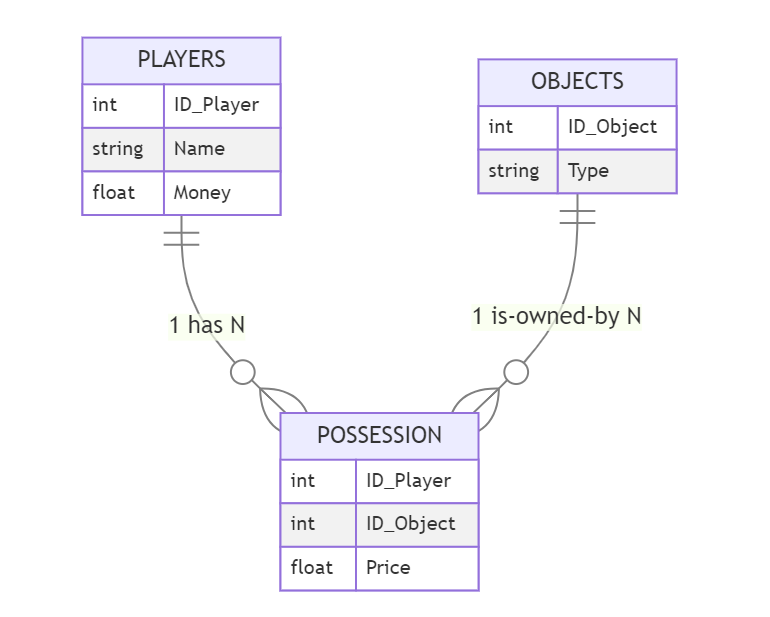

In [80]:
from IPython.display import Image
Image(filename='Capture.png')